In [30]:
from cc.collect import collect_reference_source, collect_exhaust_source, collect 
from cc import save, load 
from cc.controller import NonlinearController, NonlinearControllerOptions
from cc.env.wrappers import AddReferenceObservationWrapper, RecordVideoWrapper
import matplotlib.pyplot as plt 
from cc.env import make_env
from cc.train import TrainingOptionsController, train_controller
import optax 
import jax.random as jrand

In [34]:
from cc.utils.utils import generate_ts


time_limit = 10.0
control_timestep = 0.01 
ts = generate_ts(time_limit, control_timestep)

env = make_env("two_segments_v1", random=1, time_limit=time_limit, control_timestep=control_timestep)

In [35]:
# we trained this model in the notebook #3
model = load("model_for_two_segments_v1.pkl")

In [36]:
# create a reference source with many *feasible* (=physically possible) trajectories
source = collect_reference_source(env, seeds=[20,21,22,23,24,25,26], constant_after=True, constant_after_T=3.0)

In [37]:
controller = NonlinearController(
    NonlinearControllerOptions(
        5, 2, 1, # now 2 inputs because of reference and observation are both 1-dimensional
        "EE", jrand.PRNGKey(1,), depth_f=1, width_f=10
    )
)

In [38]:
training_options = TrainingOptionsController(
    optax.adam(3e-3), 0.0, 3000, 1, models=[model]
)

In [39]:
controller, losses = train_controller(controller, source, training_options)

  0%|          | 0/3000 [00:00<?, ?it/s]

            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            
            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            
            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            


Trainings-Loss: 64166.4141 | ParamsRegu:     0.0443:   0%|          | 1/3000 [00:00<45:13,  1.11it/s]

            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            
            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            
            If this message is display continuously then you probably forgot to compile the model or controller. 
            This can be fixed by calling `*model/controller* = equniox.filter_jit(*model/controller*).
            


Trainings-Loss:     1.0808 | ParamsRegu:     0.3128: 100%|██████████| 3000/3000 [00:50<00:00, 58.97it/s]


### So how well does our controller now perform in the actual environment? :D 

In [40]:
env_w_source = AddReferenceObservationWrapper(env, source)

In [41]:
iterator = collect(env=env_w_source, controller=controller, ts=ts)
replay_sample = next(iterator)

In [42]:
replay_sample.obs

OrderedDict([('obs',
              OrderedDict([('xpos_of_segment_end',
                            array([[[2.5717583e-16],
                                    [7.1542803e-07],
                                    [2.8245056e-06],
                                    ...,
                                    [1.3005426e+01],
                                    [1.3056919e+01],
                                    [1.3107486e+01]]], dtype=float32))])),
             ('ref',
              OrderedDict([('xpos_of_segment_end',
                            array([[[2.5717583e-16],
                                    [2.4853647e-05],
                                    [5.6197172e-05],
                                    ...,
                                    [1.1927853e+01],
                                    [1.1927853e+01],
                                    [1.1927853e+01]]], dtype=float32))]))])

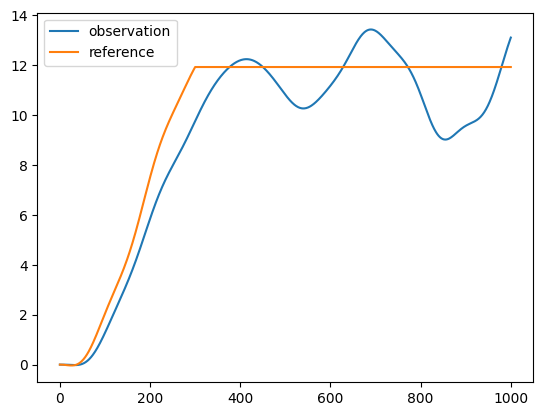

In [43]:
plt.plot(replay_sample.obs["obs"]["xpos_of_segment_end"][0], label="observation")
plt.plot(replay_sample.obs["ref"]["xpos_of_segment_end"][0], label="reference")
plt.legend()

In [44]:
source.change_reference_of_actor(1)
iterator = collect(env=env_w_source, controller=controller, ts=ts)
replay_sample = next(iterator)

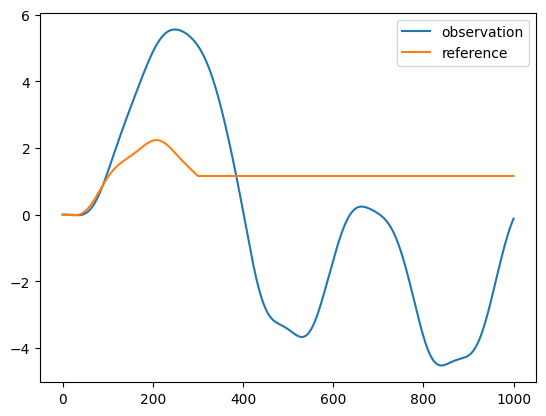

In [45]:
plt.plot(replay_sample.obs["obs"]["xpos_of_segment_end"][0], label="observation")
plt.plot(replay_sample.obs["ref"]["xpos_of_segment_end"][0], label="reference")
plt.legend()